# Workshop #2: Introduction to Statistical Modeling with Python

In [152]:
#For reading and manipulating tabular data
import numpy as np
import pandas as pd

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

#For basic statistical modeling
import scipy as sp
import sklearn as sk

## I. Data Exploration

Read the data for the southern California real-estate listing in 2009. Do some basic exploration:
- how many observations (listings) are there? What is the dimension of the feature space of the data? Which variables are quantitative and which are categorical?
- do some basic exploration of the data:
  - what are the 'typical' values for the variables? What are the spreads of the variables? 
  - are there any interesting relationships between variables? Any trends? Any comparisons?
  - pose some interesting questions you can ask of the data 

In [3]:
#Read the data into a pandas dataframe
df = pd.read_csv('California_Home_Prices(2009).csv')

#Check the shape of the dataframe
df.shape

(781, 8)

In [4]:
#Check the first couple of rows in the dataframe
df.head()

,MSL#,Location,Price,Bedrooms,Bathrooms,Sqft,Price/Sqft,Status
0,132842,Arroyo Grande,795000,3.0,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4.0,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000,4.0,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000,4.0,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900,3.0,1,1249,87.99,Short Sale


In [15]:
#Find the unique values of a column
df['Bathrooms'].unique()

array([ 3,  4,  1,  2,  5,  7,  6, 11])

### Descriptive Stats:

In [6]:
#Find the mean of a column
df['Price'].mean()

383329.1101152369

In [9]:
#Find the range of a column
print df['Price'].max(), df['Price'].min()

5499000 26500


In [10]:
#Find the standard devation of a column
df['Price'].std()

349038.1010714074

### Data Visualization:

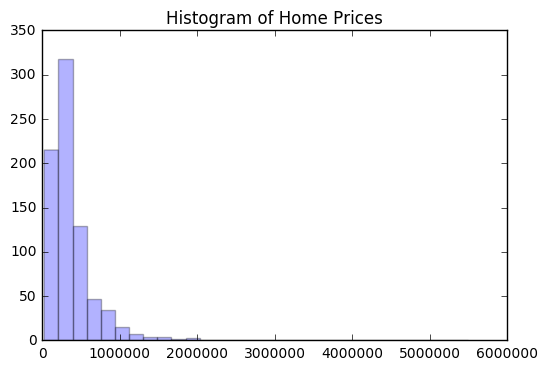

In [17]:
#Histogram the values in a column
plt.hist(df['Price'].values, bins=30, color='blue', alpha=0.3)
#Set plot title
plt.title('Histogram of Home Prices')
#Display plot
plt.show()

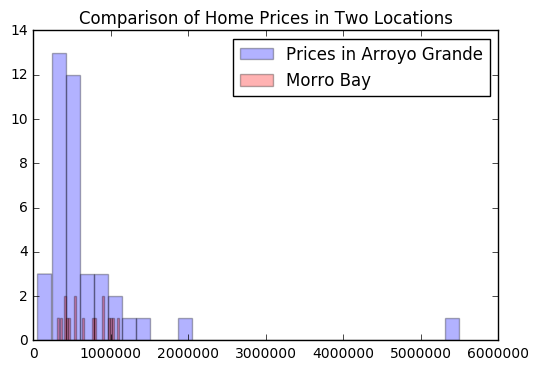

In [18]:
#Filter the dataframe
df_1 = df[df['Location'] == 'Arroyo Grande']
df_2 = df[df['Location'] == 'Morro Bay']

#Compare two histograms (un-normalized)
plt.hist(df_1['Price'].values, bins=30, color='blue', alpha=0.3, label='Prices in Arroyo Grande')
plt.hist(df_2['Price'].values, bins=30, color='red', alpha=0.3, label='Morro Bay')

#Set plot title
plt.title('Comparison of Home Prices in Two Locations')
#Create legend
plt.legend(loc='best')
#Display plot
plt.show()

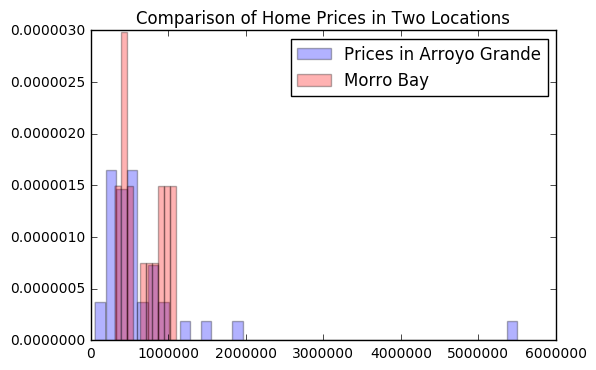

In [22]:
#Compare two histograms (normalized)
plt.hist(df_1['Price'].values, normed=True, bins=40, color='blue', alpha=0.3, label='Prices in Arroyo Grande')
plt.hist(df_2['Price'].values, normed=True, bins=10, color='red', alpha=0.3, label='Morro Bay')
#Set plot title
plt.title('Comparison of Home Prices in Two Locations')
#Create legend
plt.legend(loc='best')
#Display plot
plt.show()

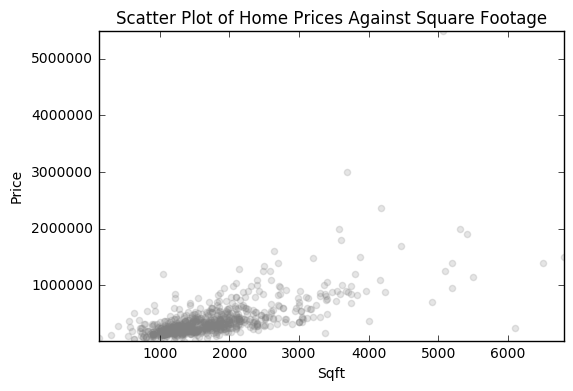

In [30]:
#Scatter plot two columns
plt.scatter(df['Sqft'].values, df['Price'].values, color='gray', alpha=0.2)
#Set plot title
plt.title('Scatter Plot of Home Prices Against Square Footage')
#Set axes labels
plt.xlabel('Sqft')
plt.ylabel('Price')
#Set axes limits
plt.xlim([df['Sqft'].min(), df['Sqft'].max()])
plt.ylim([df['Price'].min(), df['Price'].max()])
#Display plot
plt.show()

## II. Sampling a Random Variable

Suppose the price, $P$ is a random variable that is defined as
$$
P = mA + b + \epsilon 
$$
where $A$ is the square footage and $\epsilon$ is the random noise.

If we know that $\epsilon$ is normally distributed, with mean 0 and standard deviation $\sigma$. Then what is the distribution of $P$?

Let's answer this by experimenting and guessing.

In [49]:
#Sample 1000 values of epsilon from a normal distribution 
#(this is like making 100 observations of a random variable)
#For random sampling, we use numpy's random library

#variance of epsilon
variance = 1.
epsilon_observations = np.random.normal(0, variance, size=1000)

#let's set A, m and b
A = 100
m = 2 
b = 10

#Now we have 1000 observations of P, one for each epsilon
P_observations = m * A + b + epsilon_observations

print 'm * A + b = ', m * A + b

m * A + b =  210


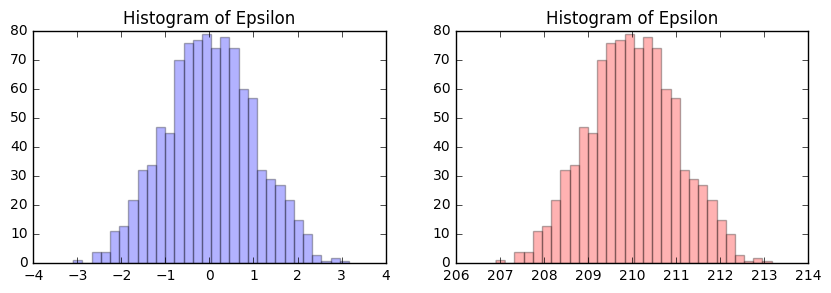

In [50]:
#Create a figure with two subplots, sitting in the same row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

#Histogram the epsilon samples
ax1.hist(epsilon_observations, bins=30, color='blue', alpha=0.3)
#Set plot title
ax1.set_title('Histogram of Epsilon')

#Histogram the mA + b + epsilon
ax2.hist(P_observations, bins=30, color='red', alpha=0.3)
#Set plot title
ax2.set_title('Histogram of Epsilon')

#Display plot
plt.show()

## III. The Likelihood Function

We've learned that if Price, $P$, is defined by
$$
P = mA + b + \epsilon
$$
then $P$ is normally distributed if $\epsilon$ is. So how can we use this information to fit our model?

Let's pretend our data has only one observation: $P$ = \$1.0 million and $A = 100$. Consider the following two models, 
1. m=20, b=-10
2. m=2, b=10

which one is more likely to be the true model for this observation?

In [122]:
#Let's see how likely is our observation under each model
#Recall that the price is normally distributed P|A, m, b, epsilon ~ N(mA + b, sigma^2)
#So the normal pdf should tell us how likely are we to observe a price for a square footage given a certain model
#We use the stats library from Scipy to create our normal models
variance = 1.
A = 100
P = 1.

model_1 = sp.stats.norm(0.001 * A + 0.1, variance)
model_2 = sp.stats.norm(.2 * A + 0.01, variance)

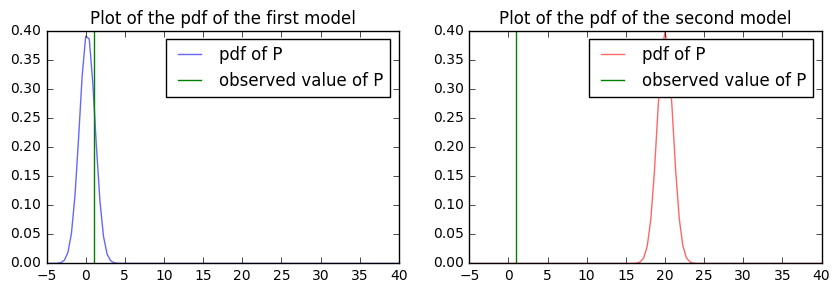

In [126]:
#create a range of prices
P_s = np.linspace(-5, 40, 100)

#Create a figure with two subplots, sitting in the same row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

#Histogram the epsilon samples
ax1.plot(P_s, model_1.pdf(P_s), color='blue', alpha=0.6, label='pdf of P')
ax1.axvline(x=P, color='green', label='observed value of P')
#Set plot title and legend
ax1.set_title('Plot of the pdf of the first model')
ax1.legend(loc='best')


#Histogram the mA + b + epsilon
ax2.plot(P_s, model_2.pdf(P_s), color='red', alpha=0.6, label='pdf of P')
ax2.axvline(x=P, color='green', label='observed value of P')
#Set plot title and legend
ax2.set_title('Plot of the pdf of the second model')
ax2.legend(loc='best')

#Display plot
plt.show()

In [127]:
print 'likelihood of data under model 1:', model_1.pdf(P)
print 'likelihood of data under model 2:', model_2.pdf(P)

likelihood of data under model 1: 0.289691552761
likelihood of data under model 2: 1.34344043624e-79


## IV. Linear and Polynomial Regression

Now we know we want to find the model, $m$ and $b$, that makes our observed data most likely - that is, we want Maximum Likelihood Estimators of the model parameters $m$ and $b$. Luckily finding there is a `python` library for finding MLE linear (and polynomial) models: `sklearn`.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [145]:
X = df['Sqft'].values
y = df['Price'].values

#First break up your data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print X_train.shape, y_train.shape

(546,) (546,)


In [150]:
#Fit a linear regression model on the train data, i.e. find the MLE model

#create an instance of a linear regression object
linear_model = LinearRegression()
#fit the linear regression model to our training data
#you need to worry about the shape of X_train!!!!
linear_model.fit(X_train.reshape((len(X_train), 1)), y_train)

#make predictions using our training data
y_train_predict = linear_model.predict(X_train.reshape((len(X_train), 1)))
#make predictions using our testing data
y_test_predict = linear_model.predict(X_test.reshape((len(X_test), 1)))

#compute error
train_error = np.mean((y_train - y_train_predict)**2)
test_error = np.mean((y_test - y_test_predict)**2)

print 'error on training set:', train_error
print 'error on testing set:', test_error

error on training set: 45723701171.0
error on testing set: 119976833723.0


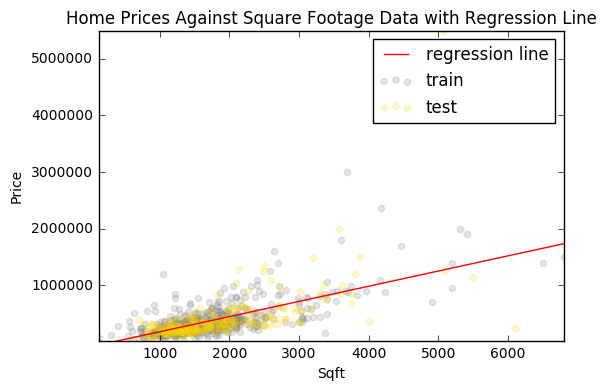

In [156]:
X_s = np.linspace(df['Sqft'].min(), df['Sqft'].max(), 100)
#get the slope and intercept we found for the model
m = linear_model.coef_ 
b = linear_model.intercept_

#Plot data against MLE model
plt.scatter(X_train, y_train, color='gray', alpha=0.2, label='train')
plt.scatter(X_test, y_test, color='gold', alpha=0.2, label='test')
plt.plot(X_s, m * X_s + b, color='red', label='regression line')
#Set plot title
plt.title('Home Prices Against Square Footage Data with Regression Line')
#Set axes labels
plt.xlabel('Sqft')
plt.ylabel('Price')
#Set axes limits
plt.xlim([df['Sqft'].min(), df['Sqft'].max()])
plt.ylim([df['Price'].min(), df['Price'].max()])
#Display plot
plt.legend(loc='best')
plt.show()

In [151]:
#Try fitting a multiple linear regression model

In [162]:
from sklearn.preprocessing import PolynomialFeatures

#Try fitting a polynomial regression model. Hint: remember that a polynomial model is secretly a linear model
degree = 2

#create a tool for turning one variable, square footage, into multiple variables, A^2, A^3, etc
poly = PolynomialFeatures(degree)
#add polynomial terms to our training data
X_train_poly = poly.fit_transform(X_train.reshape((len(X_train), 1)))
#add polynomial terms to our testing data
X_test_poly = poly.fit_transform(X_test.reshape((len(X_test), 1)))

print X_train_poly.shape, X_test_poly.shape

#now use X_train_poly, X_test_poly to fit a linear model just like in the above!

(546, 3) (235, 3)
